# Graphs in ML - TP2: Face recognition
### Dimitri Bouche (dimitri.bouche@ensae.fr)

In [56]:
import numpy as np
import scipy
import os
import importlib

# Local imports
import funcs_hfs
import helper

# Reload (for developpement)
importlib.reload(funcs_hfs)

# Get working directory path
path = os.getcwd()

## 1. Harmonic Function Solution
***Note:*** the code for the functions is in **funcs_hfs.py**

### Question 1.1: Hard HFS

We first chose $k$ once and for all so as to make sure that the graph is connected

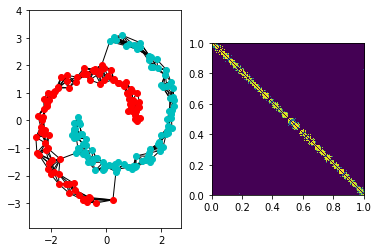

In [57]:
# Make sure empirically that the graph is connected (choice of k)
path = os.getcwd()
in_data =scipy.io.loadmat(path+'/data/data_2moons_hfs')
X = in_data['X']
Y = in_data['Y'][:, 0]

# Params for graph construction
var = 1
eps = 0
k = 7

W = helper.build_similarity_graph(X, var, eps, k)
helper.plot_graph_matrix(X, Y, W)

We then run hard HFS several times (we different random label revelations):

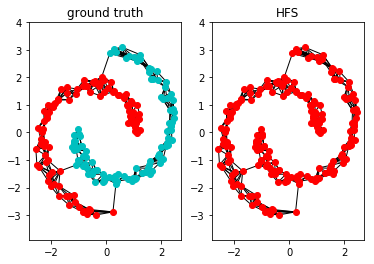

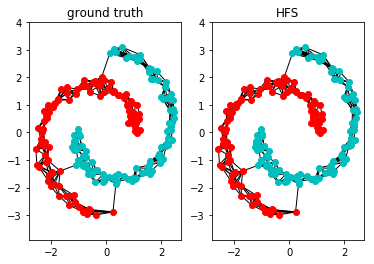

0.5
1.0


In [58]:
# Run hard HFS on the two moons dataset twice
acc1 = funcs_hfs.two_moons_hfs_hard(path, k=k)
acc2 = funcs_hfs.two_moons_hfs_hard(path, k=k)
print(acc1)
print(acc2)

***Comments on the results of hard HFS:***
We reach almost 100 % accuracy provided that we draw 2 labels in each class. If we draw 1 in a class and 3 in the other it gets more difficult and we get more approximative results and a lower accuracy. If we draw 4 labels in the same class then as we could expect, we reach only 50 % accuracy (of course, the whole dataset is predicted to have the label in question).

### Question 1.2

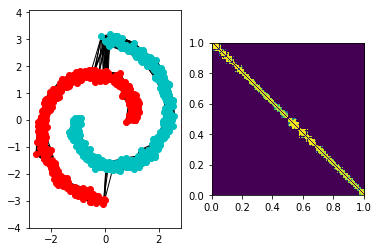

In [60]:
# Make sure empirically that the graph is connected (choice of k)
path = os.getcwd()
in_data =scipy.io.loadmat(path+'/data/data_2moons_hfs_large')
X = in_data['X']
Y = in_data['Y'][:, 0]

# Params for graph construction
var = 1
eps = 0
k = 45

W = helper.build_similarity_graph(X, var, eps, k)
helper.plot_graph_matrix(X, Y, W)

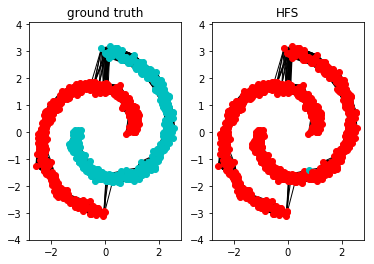

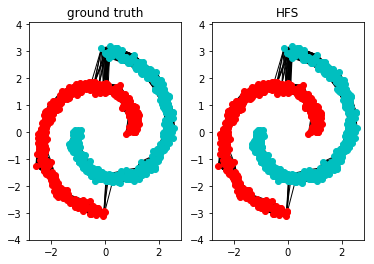

0.504
1.0


In [63]:
# Run hard HFS on the two moons extended dataset twice
acc1 = funcs_hfs.two_moons_hfs_hard(path, k=k, dataset='/data/data_2moons_hfs_large')
acc2 = funcs_hfs.two_moons_hfs_hard(path, k=k, dataset='/data/data_2moons_hfs_large')
print(acc1)
print(acc2)

**Question 1.2:**: Looking at the first realization, we have obviously drawn points from both classes (we can see a blue dot among the red dots), however a wrong label contagion occured probably along the edges that connect the two moons. Then is is either all right or all wrong.

## Question 1.3: Soft HFS

#### Soft HFS on two moons

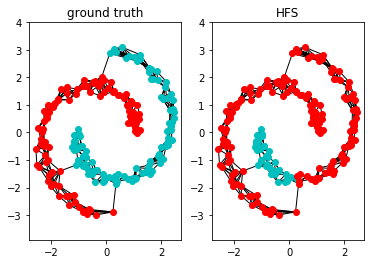

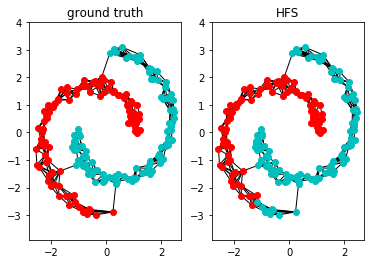

0.685
0.955


In [19]:
acc1 = funcs_hfs.two_moons_hfs_soft(path, k=k, cl=100, cu=1)
acc2 = funcs_hfs.two_moons_hfs_soft(path, k=k, cl=100, cu=1)
print(acc1)
print(acc2)

***Comments on the results for soft HFS:***
The results are not as good as in the hard HFS case. We think it is probably because since here there is no uncertainty on the labels and since we have very few of them, it is not in our best interest to use soft constraints for label matching.

#### Comparison between soft and hard HFS

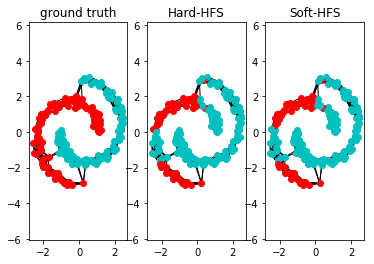

[0.755, 0.745]


In [21]:
accuracy = funcs_hfs.hard_vs_soft_hfs(path, cl=100, cu=1)
print(accuracy)

## 2. Face recognition with HFS

***Note:*** the code for the functions is in **funcs_faces_recognition.py**

In [26]:
import matplotlib.pyplot as plt
import scipy.misc as sm
import cv2

# Local imports
import funcs_faces_recognition as faces_recog

# Reload (for developpement)
importlib.reload(faces_recog)

<module 'funcs_faces_recognition' from '/home/dimitribouche/Bureau/MVA/S1/GML/TP2/Code/funcs_faces_recognition.py'>

### Question 2.1
To manage more than two labels, we encoded the label vector as a matrix using the **one hot encoding**. The problem with a binary vector of labels can be adapted to the matrix case without efforts: the solution formula remains the same for the matrix case. We then get a matrix solution for $f_u$. So as to determine the labels from this solution, instead of using positive/negative thresholding (binary case) we take the label of data point $i$ to be the index where the maximum for the $i$-th row of $f_u$ is.

In [27]:
# Set path
path = os.getcwd()
datapath = path + "/data/"

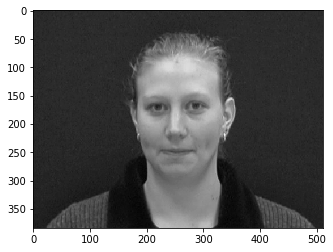

In [28]:
# Load an image and plot it as an example
im = cv2.imread(datapath + "10faces/0/01.jpg")
grayim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(grayim, cmap="gray")

In [29]:
# Load the dataset and crop the faces
X, Y = faces_recog.load_faces(datapath)

In [30]:
# Apply pre processing function on Xproc and normalize images
Xproc = (1/255) * faces_recog.pre_process(X)
X *= (1/255)

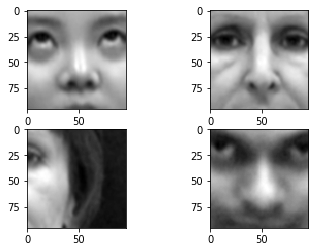

In [31]:
# Plot a few examples from the pre processed dataset
figure, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].imshow(Xproc[75, :].reshape(96, 96), cmap="gray")
axes[0, 1].imshow(Xproc[14, :].reshape(96, 96), cmap="gray")
axes[1, 0].imshow(Xproc[19, :].reshape(96, 96), cmap="gray")
axes[1, 1].imshow(Xproc[8, :].reshape(96, 96), cmap="gray")

***Remark***: here we applied successively a GaussianBlur and we equalized the histograms with equalizeHist. Let us remark that the face detection algorithm is not flawless: we plotted on purpose a case where is does not manage to find the right spot for the face. Thus some labels datapoint may be misleading. This is the case where soft HFS comes handy so as to avoid forcing perfect label matching if labelled datapoints are erroneous.

### Question 2.2
The pre-processing does not seem to have a big impact on the results. We try several combinations of blur, GaussianBlur, histogramm equalization etc... The only step that does matter very much is normalization (multiply by $\frac{1}{255}$) which greatly degrades the performance if it is not applied (althought we think this could be adapted by augmenting the variance parameter in the Gaussian Kernel for the similarity matrix: since the pairwise distance are mechanically very big, when taking the negative exponential, if we do not compensate with a very big variance parameter, we get a similarity matrix with very few information as the coeffient are very close to zero).

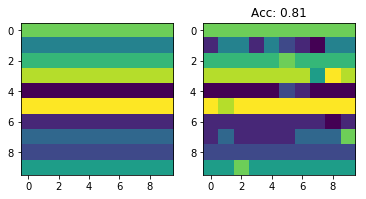

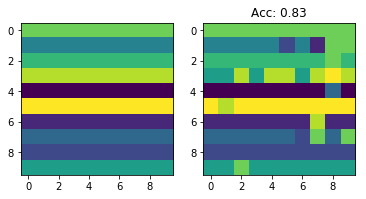

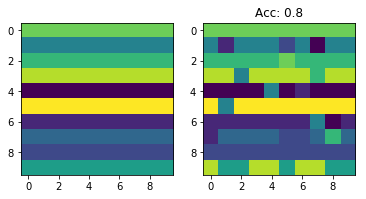

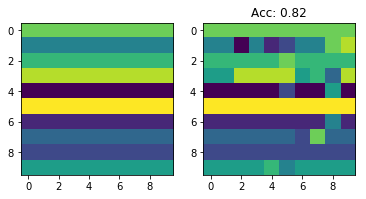

Accuracy on unlabelled data:
0.6833333333333333
0.7166666666666667
0.6666666666666666
0.7


In [38]:
# Perform hard hfs on both original and preprocessed data
acc_unlabelled1 = faces_recog.offline_face_recognition_hard(X, Y, k=10)
acc_unlabelled2 = faces_recog.offline_face_recognition_hard(Xproc, Y, k=10)
acc_unlabelled3 = faces_recog.offline_face_recognition_hard(Xproc, Y, k=10)
acc_unlabelled4 = faces_recog.offline_face_recognition_hard(Xproc, Y, k=10)
print("Accuracy on unlabelled data:")
print(acc_unlabelled1)
print(acc_unlabelled2)
print(acc_unlabelled3)
print(acc_unlabelled4)

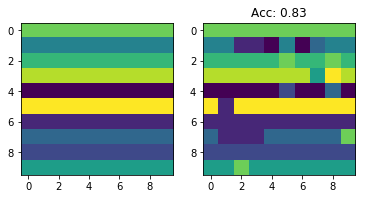

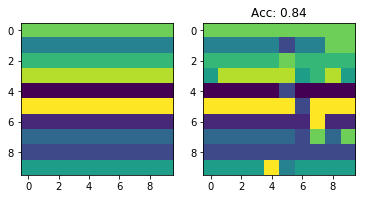

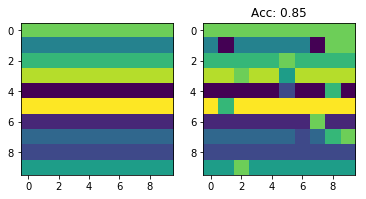

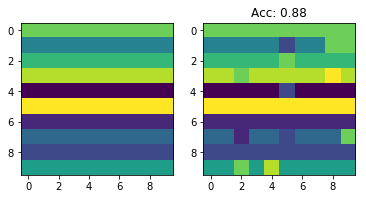

Accuracy on unlabelled data:
0.7166666666666667
0.7333333333333333
0.75
0.8


In [39]:
# Perform soft hfs on both original and preprocessed data
acc_unlabelled1 = faces_recog.offline_face_recognition_soft(X, Y, cl=100, cu=1)
acc_unlabelled2 = faces_recog.offline_face_recognition_soft(Xproc, Y, cl=100, cu=1)
acc_unlabelled3 = faces_recog.offline_face_recognition_soft(X, Y, cl=100, cu=1)
acc_unlabelled4 = faces_recog.offline_face_recognition_soft(Xproc, Y, cl=100, cu=1)
print("Accuracy on unlabelled data:")
print(acc_unlabelled1)
print(acc_unlabelled2)
print(acc_unlabelled3)
print(acc_unlabelled4)

### Question 2.3
Looking at the accuracy on unlabelled data, the performance of HFS methods is quite good (since we have ten labels the a random classifier would reach on average an accuracy of 10 % so the problem is more complex than a binary classification and the score has to be interpreted consequently). Soft HFS reaches better results than Hard HFS (roughly it is right 75 % of the time on unlabelled data whereas hard HFS performs a bit less well begin roughly right 67 % of the time). This can be explained by the fact that as shown previously the face detection algorithm is not flawless and as a consequence some revealed labels may be error inducing, cutting some slack to the HFS solution with soft HFS thus is a better idea in that case, and this can be seen in terms of scores.

In [49]:
datapath = path + "/extended_dataset/"
faces_recog.add_extension_expanded(datapath)

In [14]:
# Load the extended dataset and crop the faces
path = os.getcwd()
datapath = path
X_extended, Y_extended = faces_recog.load_faces_extended(path)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


KeyboardInterrupt: 

In [79]:
# Apply pre processing function on Xproc and normalize images
Xproc_extended = (1/255) * faces_recog.pre_process(X_extended)
X_extended *= (1/255)

In [90]:
for i in Y_extended:
    print(i)

8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


ValueError: cannot reshape array of size 4580 into shape (10,10)

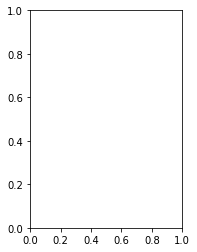

In [68]:
# Perform hard hfs on both original and preprocessed data
faces_recog.offline_face_recognition_hard(X_extended, Y_extended, k=10)
faces_recog.offline_face_recognition_hard(Xproc_extended, Y_extended, k=10)